In [49]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import LSTM, Flatten, Dense, BatchNormalization, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.optimizers import Adam


In [50]:
file_names = ['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
              'PRSA_Data_Changping_20130301-20170228.csv',
              'PRSA_Data_Dingling_20130301-20170228.csv',
              'PRSA_Data_Dongsi_20130301-20170228.csv',
              'PRSA_Data_Guanyuan_20130301-20170228.csv',
              'PRSA_Data_Gucheng_20130301-20170228.csv',
              'PRSA_Data_Huairou_20130301-20170228.csv',
              'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
              'PRSA_Data_Shunyi_20130301-20170228.csv',
              'PRSA_Data_Tiantan_20130301-20170228.csv',
              'PRSA_Data_Wanliu_20130301-20170228.csv',
              'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

dataset = ['PM2.5_Aotizhongxin','PM2.5_Changping','PM2.5_Dingling','PM2.5_Dongsi','PM2.5_Guanyuan','PM2.5_Gucheng',
           'PM2.5_Huairou','PM2.5_Nongzhanguan','PM2.5_Shunyi','PM2.5_Tiantan','PM2.5_Wanliu','PM2.5_Wanshouxigong']

In [51]:
df_Aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df_Aotizhongxin = df_Aotizhongxin.interpolate(method ='linear')

df_Aotizhongxin

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb18f47a040>,
      dtype=object)

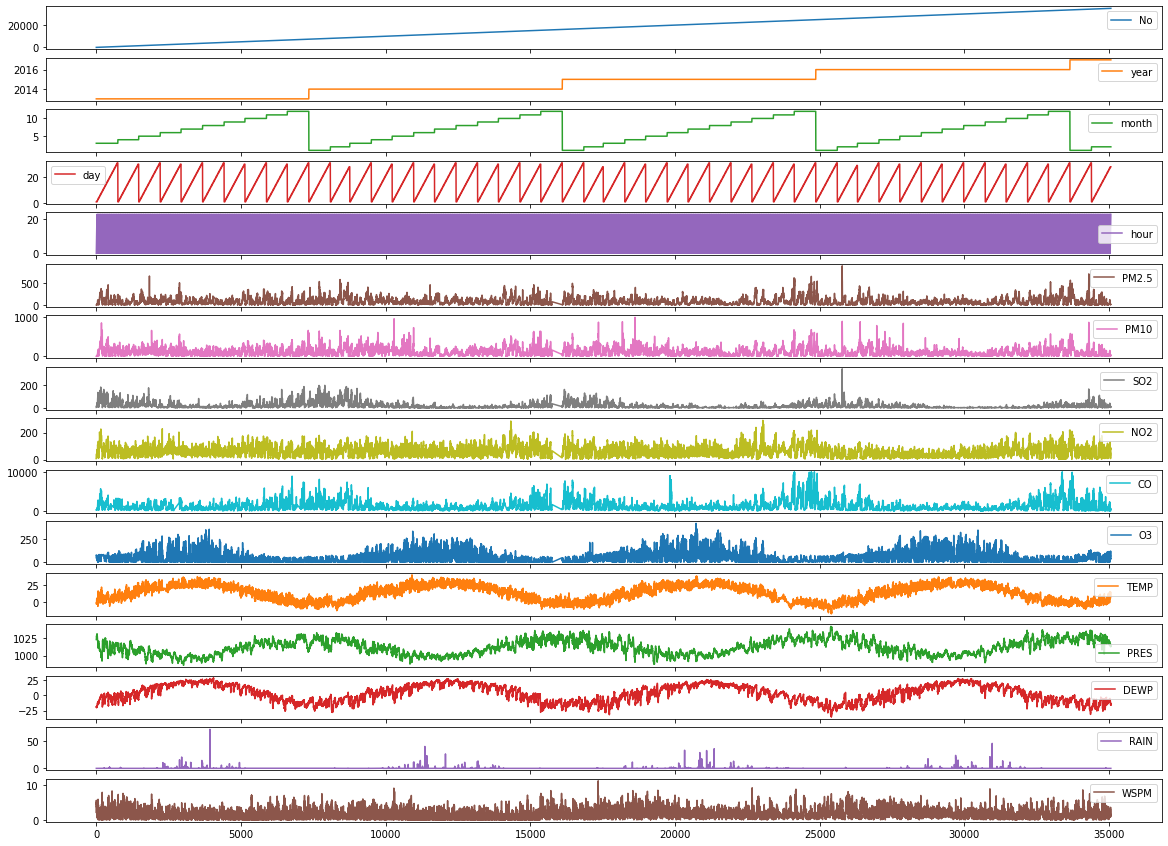

In [52]:
df_Aotizhongxin.plot(subplots=True,figsize=(20,15))

In [53]:
df_pm = pd.DataFrame()

for i in range(len(file_names)):
  df_pm[dataset[i]] = pd.read_csv(file_names[i])['PM2.5']
  df_pm[dataset[i]] = df_pm[dataset[i]].interpolate(method ='linear')

df_pm

,PM2.5_Aotizhongxin,PM2.5_Changping,PM2.5_Dingling,PM2.5_Dongsi,PM2.5_Guanyuan,PM2.5_Gucheng,PM2.5_Huairou,PM2.5_Nongzhanguan,PM2.5_Shunyi,PM2.5_Tiantan,PM2.5_Wanliu,PM2.5_Wanshouxigong
0,4.0,3.0,4.0,9.0,4.0,6.0,7.0,5.0,3.0,6.0,8.0,9.0
1,8.0,3.0,7.0,4.0,4.0,6.0,4.0,8.0,12.0,6.0,9.0,11.0
2,7.0,3.0,5.0,7.0,3.0,5.0,4.0,3.0,14.0,6.0,3.0,8.0
3,6.0,3.0,6.0,3.0,3.0,6.0,3.0,5.0,12.0,6.0,11.0,8.0
4,3.0,3.0,5.0,3.0,3.0,5.0,3.0,5.0,12.0,5.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,28.0,11.0,16.0,13.0,14.0,16.0,14.0,27.0,20.0,11.0,11.0
35060,13.0,12.0,13.0,18.0,20.0,27.0,21.0,18.0,47.0,11.0,15.0,13.0
35061,16.0,7.0,9.0,23.0,16.0,22.0,17.0,15.0,18.0,18.0,13.0,14.0
35062,21.0,11.0,10.0,23.0,11.0,9.0,11.0,11.0,18.0,15.0,12.0,12.0


In [54]:
mapping = {'N': 0, 'NNE': 22.5,'NE' : 45,'ENE' : 67.5,'E': 90, "ESE" : 112.5,
           "SE" : 135,"SSE" : 157.5, "S" : 180,'SSW' : 202.5, "SW" : 225,
           "WSW" : 247.5,"W": 270 , "WNW": 292.5, "NW": 315, "NNW" :  337.5}

df_Aotizhongxin = df_Aotizhongxin.applymap(lambda s: mapping.get(s) if s in mapping else s)

df_Aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       34983 non-null  float64
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(12), int64(5), object(1)
memory usage: 4.8+ MB


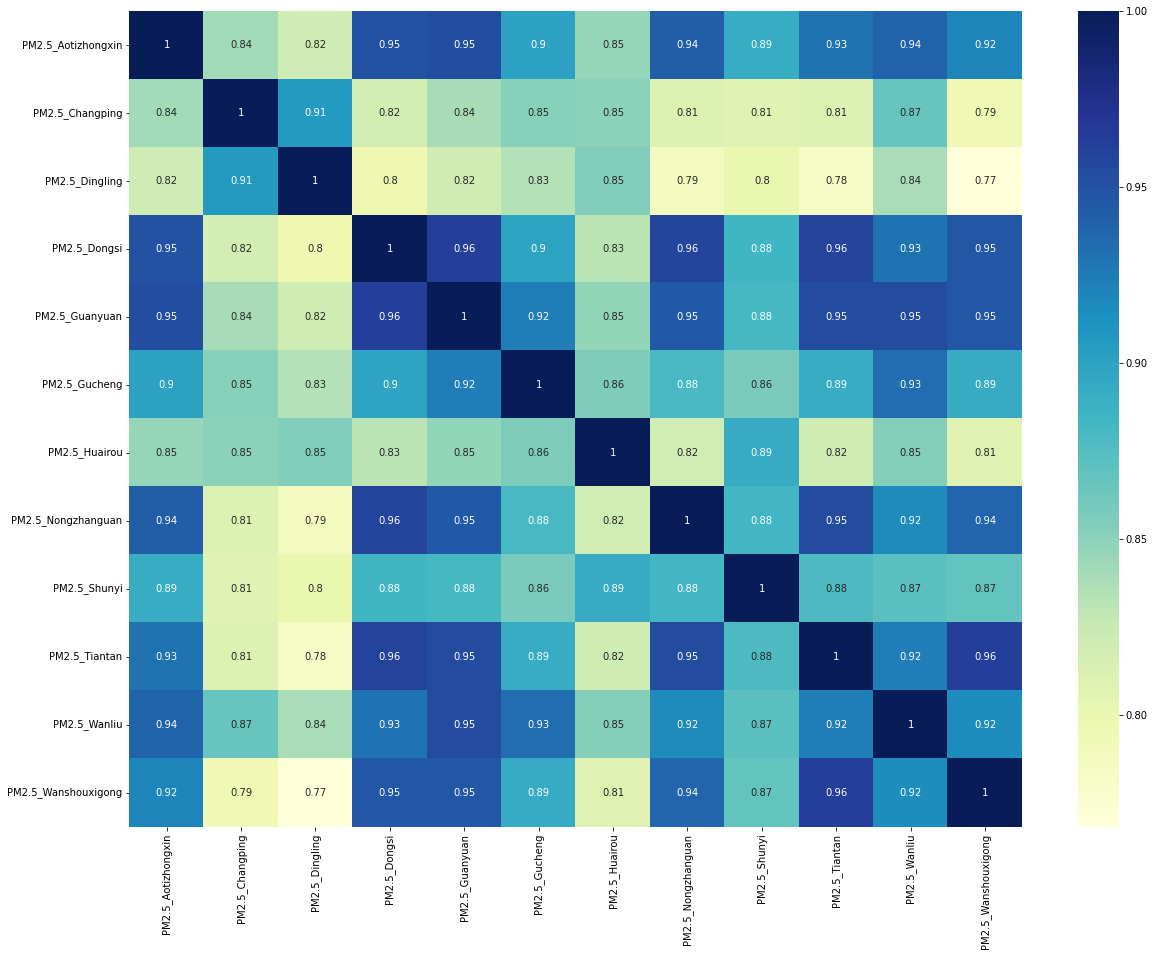

In [58]:
col = df_pm.columns

scaler = MinMaxScaler(feature_range = (0,1))
df_pm_scale = pd.DataFrame(scaler.fit(df_pm).transform(df_pm), columns = col)
plt.figure(figsize=(20,15))
dataplot = sns.heatmap(df_pm_scale.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [59]:
date = df_Aotizhongxin[['year','month','day','hour']]
feature_selection = pd.concat([df_Aotizhongxin[['PM10','CO','TEMP','PRES','DEWP','RAIN','wd','WSPM']],df_pm],axis=1)
df = scaler.fit_transform(feature_selection)
df = pd.DataFrame(df,columns=feature_selection.columns)
feature_selection = pd.concat([date, df],axis=1)
feature_selection.index = pd.to_datetime(feature_selection[['year', 'month', 'day', 'hour']], format='%Y %m %d %H')
feature_selection = feature_selection.drop(columns=['year', 'month', 'day', 'hour'])
feature_selection

,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM,PM2.5_Aotizhongxin,PM2.5_Changping,PM2.5_Dingling,PM2.5_Dongsi,PM2.5_Guanyuan,PM2.5_Gucheng,PM2.5_Huairou,PM2.5_Nongzhanguan,PM2.5_Shunyi,PM2.5_Tiantan,PM2.5_Wanliu,PM2.5_Wanshouxigong
2013-03-01 00:00:00,0.002037,0.020202,0.280977,0.661319,0.258621,0.0,1.000000,0.392857,0.001117,0.001136,0.001139,0.008174,0.002950,0.005208,0.006579,0.003563,0.001065,0.003667,0.006283,0.006024
2013-03-01 01:00:00,0.006110,0.020202,0.273997,0.664884,0.268025,0.0,0.000000,0.419643,0.005587,0.001136,0.004556,0.001362,0.002950,0.005208,0.002632,0.007126,0.010650,0.003667,0.007330,0.008032
2013-03-01 02:00:00,0.005092,0.020202,0.273997,0.670232,0.268025,0.0,1.000000,0.500000,0.004469,0.001136,0.002278,0.005450,0.001475,0.003906,0.002632,0.001188,0.012780,0.003667,0.001047,0.005020
2013-03-01 03:00:00,0.004073,0.020202,0.268761,0.688057,0.249216,0.0,0.933333,0.276786,0.003352,0.001136,0.003417,0.000000,0.001475,0.005208,0.001316,0.003563,0.010650,0.003667,0.009424,0.005020
2013-03-01 04:00:00,0.001018,0.020202,0.258290,0.700535,0.247649,0.0,0.000000,0.178571,0.000000,0.001136,0.002278,0.000000,0.001475,0.003906,0.001316,0.003563,0.010650,0.002445,0.001047,0.005020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,0.027495,0.030303,0.511344,0.491979,0.299373,0.0,0.933333,0.214286,0.010056,0.029545,0.009112,0.017711,0.016224,0.015625,0.018421,0.014252,0.026624,0.020782,0.009424,0.008032
2017-02-28 20:00:00,0.035642,0.040404,0.495637,0.493761,0.316614,0.0,0.866667,0.080357,0.011173,0.011364,0.011390,0.020436,0.026549,0.032552,0.025000,0.019002,0.047923,0.009780,0.013613,0.010040
2017-02-28 21:00:00,0.035642,0.060606,0.481675,0.504456,0.344828,0.0,0.933333,0.098214,0.014525,0.005682,0.006834,0.027248,0.020649,0.026042,0.019737,0.015439,0.017039,0.018337,0.011518,0.011044
2017-02-28 22:00:00,0.042770,0.060606,0.476440,0.508021,0.351097,0.0,1.000000,0.107143,0.020112,0.010227,0.007973,0.027248,0.013274,0.009115,0.011842,0.010689,0.017039,0.014670,0.010471,0.009036


In [60]:
feature_selection.to_csv('feature_selection.csv')

In [ ]:
x = np.array(feature_selection)

X = []
Y = []

lag = 24

for i in range (lag , len(x)):
  X.append(x[i-lag:i,:])
  Y.append(x[i,8:9])

X = np.array(X)
Y = np.array(Y)

X_train = X[:28032]
X_test = X[28032:]
Y_train = Y[:28032]
Y_test = Y[28032:]


In [29]:
callback = tf.keras.callbacks.EarlyStopping(min_delta=1e-3, patience=50, monitor="loss")

model = Sequential()
model.add(Conv1D(64, 5, padding='causal', activation="relu", input_shape=[24,20]))
model.add(BatchNormalization())
model.add(Conv1D(64, 5, padding='causal', activation="relu"))
model.add(BatchNormalization())
model.add(Conv1D(32, 5, padding='causal', activation="relu"))

model.add(MaxPooling1D())
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(1, activation="relu"))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_rate=0.947, decay_steps=100)

model.compile(optimizer=Adam(learning_rate=lr_schedule), loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            3904      
                                                                 
 batch_normalization (BatchN  (None, 24, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0

In [31]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2, validation_data=(X_test,Y_test), callbacks=[callback])


Epoch 1/20
438/438 - 15s - loss: 0.0036 - val_loss: 0.0016 - 15s/epoch - 35ms/step
Epoch 2/20
438/438 - 3s - loss: 0.0012 - val_loss: 0.0012 - 3s/epoch - 7ms/step
Epoch 3/20
438/438 - 3s - loss: 9.4622e-04 - val_loss: 5.3840e-04 - 3s/epoch - 7ms/step
Epoch 4/20
438/438 - 3s - loss: 8.0696e-04 - val_loss: 4.6401e-04 - 3s/epoch - 7ms/step
Epoch 5/20
438/438 - 3s - loss: 6.9644e-04 - val_loss: 9.9914e-04 - 3s/epoch - 7ms/step
Epoch 6/20
438/438 - 3s - loss: 6.8189e-04 - val_loss: 4.7402e-04 - 3s/epoch - 7ms/step
Epoch 7/20
438/438 - 3s - loss: 6.2269e-04 - val_loss: 4.3735e-04 - 3s/epoch - 7ms/step
Epoch 8/20
438/438 - 3s - loss: 6.2864e-04 - val_loss: 3.8828e-04 - 3s/epoch - 7ms/step
Epoch 9/20
438/438 - 3s - loss: 6.1123e-04 - val_loss: 4.3196e-04 - 3s/epoch - 7ms/step
Epoch 10/20
438/438 - 3s - loss: 5.7578e-04 - val_loss: 7.4917e-04 - 3s/epoch - 7ms/step
Epoch 11/20
438/438 - 3s - loss: 5.5288e-04 - val_loss: 5.8645e-04 - 3s/epoch - 7ms/step
Epoch 12/20
438/438 - 3s - loss: 5.5027e-04

Text(0, 0.5, 'MSE')

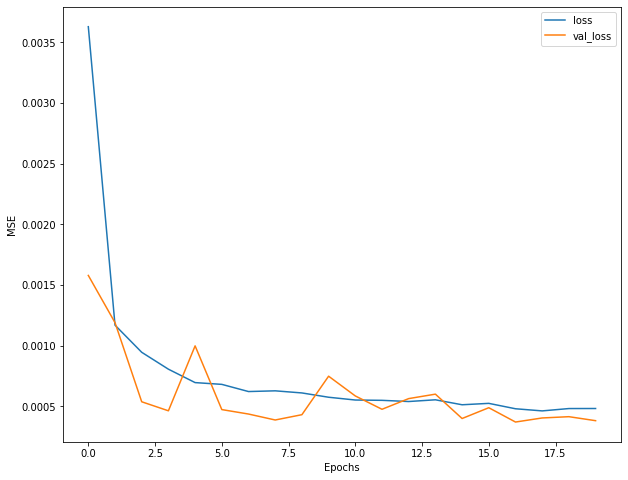

In [32]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [33]:
Y_pred = model.predict(X_test)

219/219 [==============================] - 1s 3ms/step


In [34]:
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print('MSE  : ',MSE)
print('RMSE : ',RMSE)
print('MAE  : ',MAE)
print('R2   : ',R2)

MSE  :  0.0003826189354184181 
RMSE :  0.0195606476226739 
MAE  :  0.012308921757467789 
R2   :  0.9561626444513789


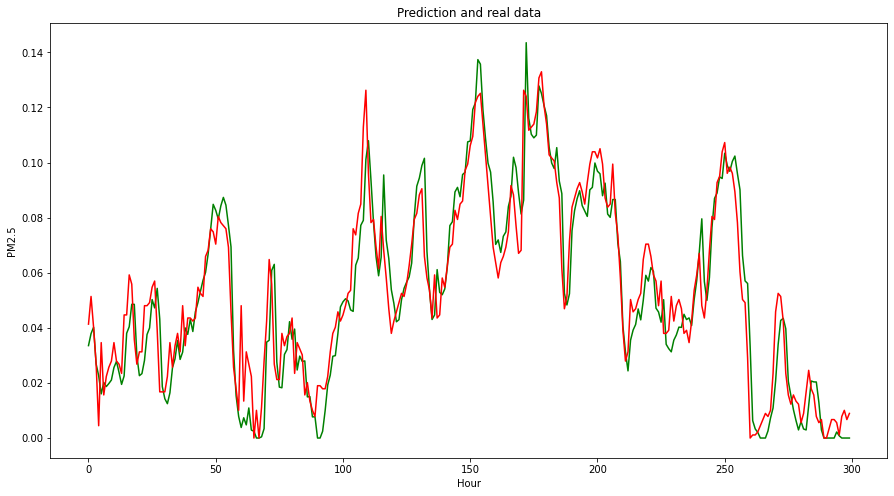

In [38]:
plt.figure(figsize=(15,8))
plt.plot(Y_pred[:300,:], color= 'green')
plt.plot(Y_test[:300,:] , color = 'red')
plt.title("Prediction and real data")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()

In [ ]:
x = np.array(feature_selection)

X2 = []
Y2 = []

lag = 7*24

for i in range (lag , len(x)):
  X2.append(x[i-lag:i,:])
  Y2.append(x[i,8:9])

X2 = np.array(X2)
Y2 = np.array(Y2)

X_train2 = X2[:28032]
X_test2 = X2[28032:]
Y_train2 = Y2[:28032]
Y_test2 = Y2[28032:]


In [41]:
callback = tf.keras.callbacks.EarlyStopping(min_delta=1e-3, patience=50, monitor="loss")

model_2 = Sequential()
model_2.add(Conv1D(64, 5, padding='causal', activation="relu", input_shape=[24,20]))
model_2.add(BatchNormalization())
model_2.add(Conv1D(64, 5, padding='causal', activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Conv1D(32, 5, padding='causal', activation="relu"))

model_2.add(MaxPooling1D())
model_2.add(LSTM(100,return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(LSTM(50))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(1, activation="relu"))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_rate=0.947, decay_steps=100)

model_2.compile(optimizer=Adam(learning_rate=lr_schedule), loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])
model_2.summary()


In [43]:
history2 = model_2.fit(X_train2, Y_train2, epochs=20, batch_size=32, verbose=2, validation_data=(X_test2,Y_test2), callbacks=[callback])


Epoch 1/20
876/876 [==============================] - 14s 11ms/step - loss: 0.0042 - val_loss: 7.8515e-04
Epoch 2/20
876/876 [==============================] - 9s 10ms/step - loss: 0.0010 - val_loss: 6.4211e-04
Epoch 3/20
876/876 [==============================] - 9s 10ms/step - loss: 8.3151e-04 - val_loss: 9.0657e-04
Epoch 4/20
876/876 [==============================] - 9s 10ms/step - loss: 7.4703e-04 - val_loss: 5.6929e-04
Epoch 5/20
876/876 [==============================] - 9s 10ms/step - loss: 7.0777e-04 - val_loss: 6.0231e-04
Epoch 6/20
876/876 [==============================] - 9s 10ms/step - loss: 6.6755e-04 - val_loss: 5.9946e-04
Epoch 7/20
876/876 [==============================] - 9s 10ms/step - loss: 6.6874e-04 - val_loss: 6.3738e-04
Epoch 8/20
876/876 [==============================] - 9s 10ms/step - loss: 6.2633e-04 - val_loss: 3.6771e-04
Epoch 9/20
876/876 [==============================] - 9s 10ms/step - loss: 6.2008e-04 - val_loss: 4.8593e-04
Epoch 10/20
876/876 [=====

Text(0, 0.5, 'MSE')

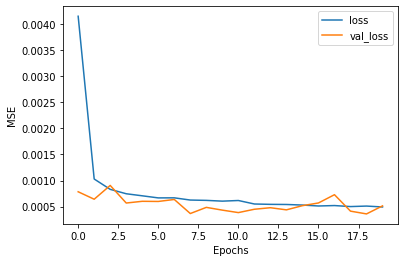

In [44]:
plt.plot(history2.history["loss"],label="loss")
plt.plot(history2.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [46]:
Y_2_pred = model_2.predict(X_test2)

215/215 [==============================] - 2s 5ms/step


In [61]:
MSE = mean_squared_error(Y_test2, Y_2_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test2,Y_2_pred)
R2 = r2_score(Y_test2,Y_2_pred)


print('MSE  : ',MSE)
print('RMSE : ',RMSE)
print('MAE  : ',MAE)
print('R2   : ',R2)

MSE  :  0.0005145308362142312
RMSE :  0.02268327216726527
MAE  :  0.013715604493098768
R2   :  0.9419583134352644


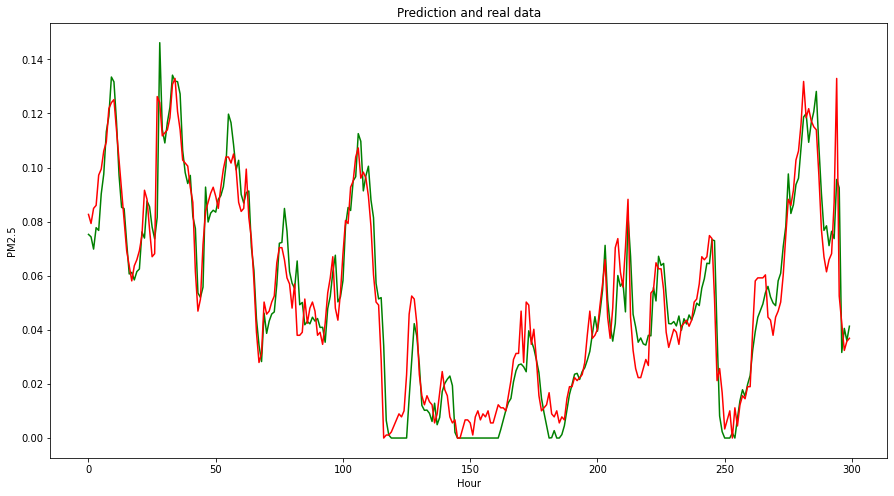

In [48]:
plt.figure(figsize=(15,8))
plt.plot(Y_2_pred[:300,:], color= 'green')
plt.plot(Y_test2[:300,:] , color = 'red')
plt.title("Prediction and real data")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()